## 1.Import Denpendencies

In [82]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles  # for default styles
mp_holistic = mp.solutions.holistic
mp_face_mesh = mp.solutions.face_mesh

## 2.Keypoints using MP Holistic

In [6]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [84]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [7]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [86]:
def draw_styled_landmarks(image, results):
    # Draw face mesh with light green
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.face_landmarks,
            mp_face_mesh.FACEMESH_TESSELATION,
            mp_drawing.DrawingSpec(color=(144, 238, 144), thickness=1, circle_radius=1),  # light green points
            mp_drawing.DrawingSpec(color=(144, 238, 144), thickness=1, circle_radius=1)   # light green mesh
        )

    # Draw pose landmarks
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)
        )

    # Draw left hand
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.left_hand_landmarks,
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=4),     # Blue
            mp_drawing.DrawingSpec(color=(0, 0, 180), thickness=2, circle_radius=2)
        )

    # Draw right hand
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.right_hand_landmarks,
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(255, 165, 0), thickness=2, circle_radius=4),   # Orange
            mp_drawing.DrawingSpec(color=(180, 100, 0), thickness=2, circle_radius=2)
        )


In [13]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [ ]:
mp_holistic.draw_landmarks??

In [93]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [57]:
len(results.left_hand_landmarks.landmark)

21

In [20]:
results

mediapipe.python.solution_base.SolutionOutputs

In [21]:
draw_landmarks(frame, results)

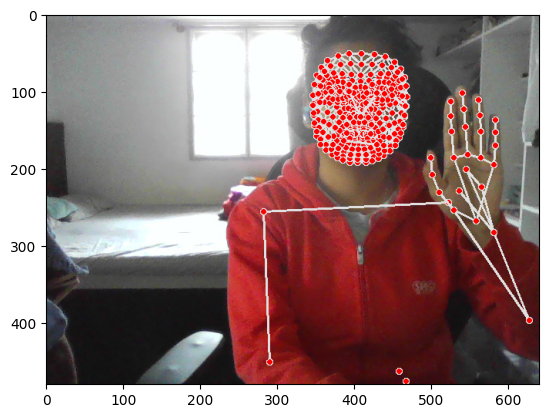

In [22]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

## 3. Extract Keypoint Values

In [43]:
len(results.pose_landmarks.landmark)

33

In [41]:
pose = []
for res in results.pose_landmarks.landmark:
    test=np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [80]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten()
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten()if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [85]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
    if results.face_landmarks 
    else np.zeros(1404)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [88]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [102]:
result_test = extract_keypoints(results)

In [103]:
result_test

array([ 0.71105939,  0.31792074, -1.13759351, ...,  0.        ,
        0.        ,  0.        ])

In [104]:
np.save('0', result_test)

In [105]:
np.load('0.npy')

array([ 0.71105939,  0.31792074, -1.13759351, ...,  0.        ,
        0.        ,  0.        ])

## 4. Setup Folders for Collection

In [5]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [6]:
for action in actions: 
    dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
        except:
            pass

## 5. Collect Keypoint Values for Training and Testing

In [12]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()


## 6. Preprocess Data and Create Labels and Features

In [7]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [8]:
label_map = {label:num for num, label in enumerate(actions)}

In [15]:
label_map

{np.str_('hello'): 0, np.str_('thanks'): 1, np.str_('iloveyou'): 2}

In [11]:
sequences, labels = [], []

for action in actions:
    action_path = os.path.join(DATA_PATH, action)

    # Ensure the directory exists
    if not os.path.exists(action_path):
        continue

    for sequence in sorted(os.listdir(action_path)):
        sequence_path = os.path.join(action_path, sequence)
        
        # Skip if it's not a directory
        if not os.path.isdir(sequence_path):
            continue

        window = []
        for frame_num in range(sequence_length):
            frame_path = os.path.join(sequence_path, f"{frame_num}.npy")

            if not os.path.isfile(frame_path):
                print(f"Missing file: {frame_path}")
                break  # skip this sequence if any frame is missing

            res = np.load(frame_path)
            window.append(res)

        if len(window) == sequence_length:
            sequences.append(window)
            labels.append(label_map[action])


Missing file: MP_Data\hello\0\0.npy
Missing file: MP_Data\hello\1\0.npy
Missing file: MP_Data\hello\10\0.npy
Missing file: MP_Data\hello\100\0.npy
Missing file: MP_Data\hello\101\0.npy
Missing file: MP_Data\hello\102\0.npy
Missing file: MP_Data\hello\103\0.npy
Missing file: MP_Data\hello\104\0.npy
Missing file: MP_Data\hello\105\0.npy
Missing file: MP_Data\hello\106\0.npy
Missing file: MP_Data\hello\107\0.npy
Missing file: MP_Data\hello\108\0.npy
Missing file: MP_Data\hello\109\0.npy
Missing file: MP_Data\hello\11\0.npy
Missing file: MP_Data\hello\110\0.npy
Missing file: MP_Data\hello\111\0.npy
Missing file: MP_Data\hello\112\0.npy
Missing file: MP_Data\hello\113\0.npy
Missing file: MP_Data\hello\114\0.npy
Missing file: MP_Data\hello\115\0.npy
Missing file: MP_Data\hello\116\0.npy
Missing file: MP_Data\hello\117\0.npy
Missing file: MP_Data\hello\118\0.npy
Missing file: MP_Data\hello\119\0.npy
Missing file: MP_Data\hello\12\0.npy
Missing file: MP_Data\hello\120\0.npy
Missing file: MP_Da

In [12]:
np.array(sequences).shape

(90, 30, 1662)

In [13]:
x = np.array(sequences)

In [27]:
x.shape

(90, 30, 1662)

In [22]:
y = to_categorical(labels).astype(int)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.05)

In [24]:
y_test.shape

(5, 3)

## 7. Build and Train LSTM Neural Network

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [26]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [70]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [60]:
res = [ .7,0.2, 0.1]

In [61]:
actions[np.argmax(res)]

np.str_('hello')

In [71]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [31]:
 model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - categorical_accuracy: 0.1801 - loss: 1.1107
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - categorical_accuracy: 0.3230 - loss: 2.2895
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - categorical_accuracy: 0.3210 - loss: 1.3045
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - categorical_accuracy: 0.3210 - loss: 6.0803
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - categorical_accuracy: 0.3581 - loss: 9.9483
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - categorical_accuracy: 0.2740 - loss: 1.1859
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - categorical_accuracy: 0.3503 - loss: 1.1052
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - categorical_accuracy: 0.4012 - loss: 1.1563
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - categorical_accuracy: 0.2916 - loss: 1.1825
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - categorical_accuracy: 0.4246 - loss: 1.0818
Epoch 11/2000
3/3 ━━━━━━━━

In [63]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 30, 64)              │         442,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 30, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 596,675 (2.28 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

## 8. Make Predictions

In [64]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 841ms/step


In [65]:
actions[np.argmax(res[4])]

np.str_('hello')

In [66]:
actions[np.argmax(y_test[4])]

np.str_('hello')

## 9. Save Weights

In [67]:
model.save('action.keras')

In [68]:
del model

In [72]:
model.load_weights('action.keras')

## 10. Evaluation using Confusion Matrix and Accuracy

In [73]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [74]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step


In [75]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [76]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[0, 2],
        [0, 3]],

       [[4, 0],
        [1, 0]],

       [[4, 0],
        [1, 0]]])

In [77]:
accuracy_score(ytrue, yhat)

0.6

## 11. Test in Real Time

In [92]:
from scipy import stats

In [93]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

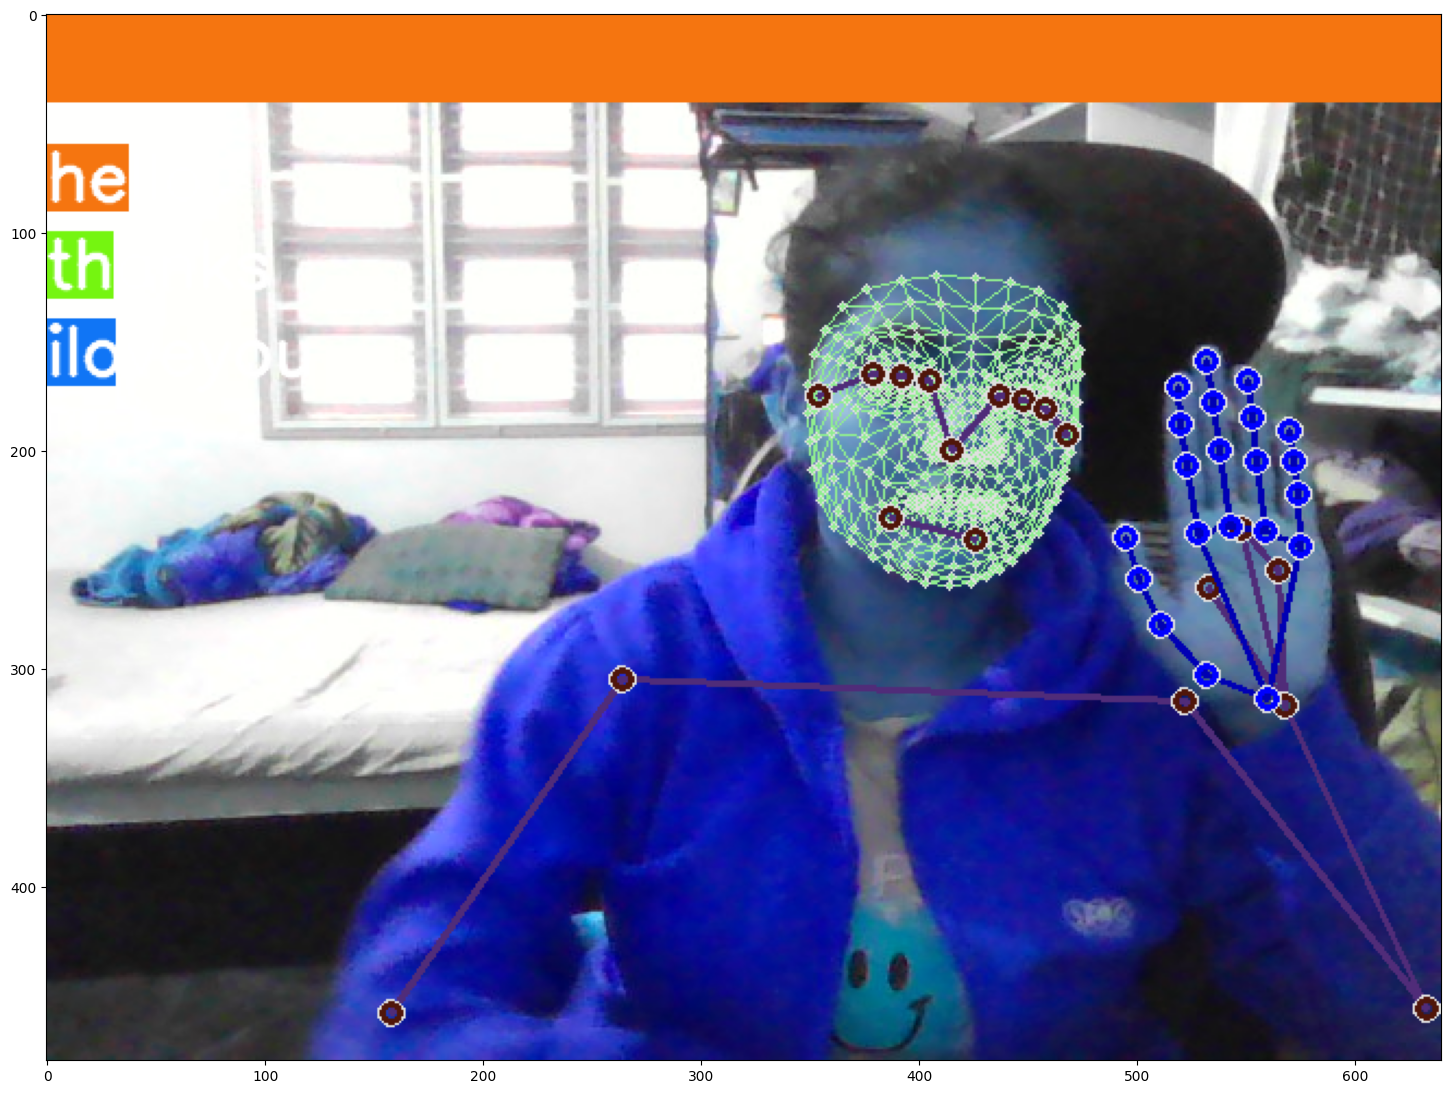

In [96]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [95]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [79]:
np.expand_dims(X_test[0], axis=0)

array([[[ 0.61843562,  0.37286848, -1.20537066, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.65280372,  0.37287489, -1.02870548, ...,  0.45113406,
          0.31689602, -0.03960522],
        [ 0.6610505 ,  0.37284625, -0.91749895, ...,  0.47784451,
          0.25214681, -0.03853553],
        ...,
        [ 0.66766292,  0.3593412 , -1.08585   , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.66181242,  0.35919082, -1.12154269, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.6612615 ,  0.35767224, -1.13520634, ...,  0.        ,
          0.        ,  0.        ]]])

In [ ]:
(n

In [80]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step


array([[0.37158754, 0.31830466, 0.31010777]], dtype=float32)